# Kernels

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # Default seaborn theme, scaling & color palette

## A sine-wave with gaussian noise

Text(0, 0.5, '$f(x)$')

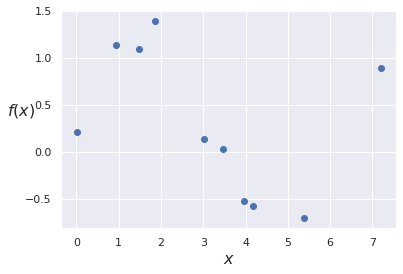

In [77]:
num_points = 10
noise = 0.5

np.random.seed(1)
x = np.random.uniform(0, 10, size=num_points)
x = np.sort(x)
y = np.sin(x) + np.random.uniform(0, noise, size=num_points)
plt.plot(x, y, 'o') 
plt.xlabel('$x$', fontsize=16) 
plt.ylabel('$f(x)$', fontsize=16, rotation=0)

## Kernels
For each value of the independent variable create a vector with values:
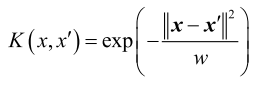
Where x' are the knot/centroid points. Here spread evenly over the range of the data.
* The size of the elements of the kernel for each data point is a measure of the simularity of the data point and the knot point.

In [83]:
def gauss_kernel(x, n_knots=5, w=2): 
    """
    Simple Gaussian radial kernel 
    """
    knots = np.linspace(np.floor(x.min()), np.ceil(x.max()), n_knots)
    return np.array([np.exp(-(x-k)**2/w) for k in knots])

In [84]:
gauss_kernel(x, n_knots=5, w=2)

array([[9.99999346e-01, 6.52906853e-01, 3.40661973e-01, 1.76463130e-01,
        1.03553786e-02, 2.55268176e-03, 3.81568019e-04, 1.67359290e-04,
        4.96256135e-07, 5.40677244e-12],
       [1.35645128e-01, 5.60150989e-01, 8.67841002e-01, 9.90605319e-01,
        5.92385442e-01, 3.46665042e-01, 1.44298394e-01, 9.49003841e-02,
        3.21528602e-03, 1.32132052e-06],
       [3.37000663e-04, 8.80199381e-03, 4.04928873e-02, 1.01851963e-01,
        6.20675847e-01, 8.62274406e-01, 9.99477675e-01, 9.85617006e-01,
        3.81553470e-01, 5.91425905e-03],
       [1.53348447e-08, 2.53325602e-06, 3.46050433e-05, 1.91805133e-04,
        1.19109770e-02, 3.92828524e-02, 1.26796356e-01, 1.87486706e-01,
        8.29303073e-01, 4.84858014e-01],
       [1.27805659e-14, 1.33536251e-11, 5.41654209e-10, 6.61565910e-09,
        4.18650872e-06, 3.27780118e-05, 2.94620199e-04, 6.53213033e-04,
        3.30136251e-02, 7.28032698e-01]])

In [85]:
kernels = gauss_kernel(x, n_knots=5, w=2)  # knots, sample

### Plot the higher kernel representation of the independent variable.
* Representation of each data point is shown in order from smallest value

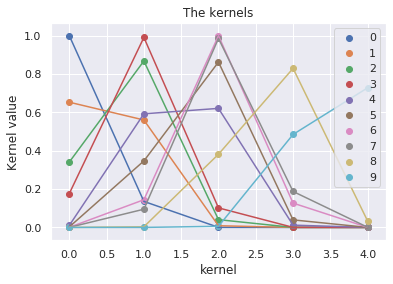

In [86]:
plt.title('The kernels')
plt.xlabel('kernel')
plt.ylabel('Kernel value')
for data_point, kernel in enumerate(kernels.T):
    plt.scatter([0,1,2,3,4], kernel, label=data_point)
    plt.plot(kernel)
plt.legend()

## Create the model
* Now we have the higher dimensional representation of each data point we can fit using a linear model:
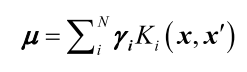
We assume gaussian noise in the data on top of this.

In [42]:
import pymc3 as pm

In [97]:
n_knots = 10  # num knots = num kernels

kernel_model = pm.Model()
with kernel_model:
    gamma = pm.Cauchy('gamma', alpha=0, beta=1, shape=n_knots)  # kernel multiplier priors
    
    # noise
    sd = pm.Uniform('sd',0, 10)
    
    mu = pm.math.dot(gamma, gauss_kernel(x, n_knots))
    yl = pm.Normal('yl', mu=mu, sd=sd, observed=y)  # likelihood

In [98]:
with kernel_model:
    kernel_trace = pm.sample(10000, step=pm.Metropolis())

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sd]
>Metropolis: [gamma]
Sampling 4 chains, 0 divergences: 100%|██████████| 42000/42000 [00:06<00:00, 6474.10draws/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/s

/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/s

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f540aeeaed0>,
      dtype=object)

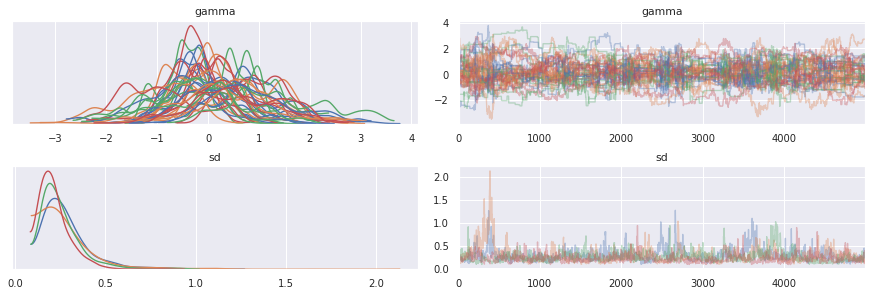

In [99]:
chain = kernel_trace[5000:] 
pm.traceplot(chain)

## Posterior checks

/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
/home/sean/anaconda3/envs/bayesian_data_analysis_with_python/lib/python3.7/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 100/100 [00:00<00:00, 468.78it/s]


Text(0, 0.5, '$f(x)$')

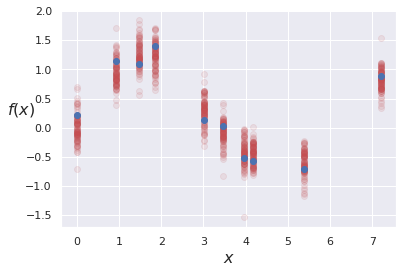

In [100]:
ppc = pm.sample_ppc(chain, model=kernel_model, samples=100) 
plt.plot(x, ppc['yl'].T, 'ro', alpha=0.1) 
plt.plot(x, y, 'bo')
plt.xlabel('$x$', fontsize=16) 
plt.ylabel('$f(x)$', fontsize=16, rotation=0)

## Test results
* Use new set of independent variables.
* Calculate the kernel space.
* Use the gamma values from the posterior to predict f(x)

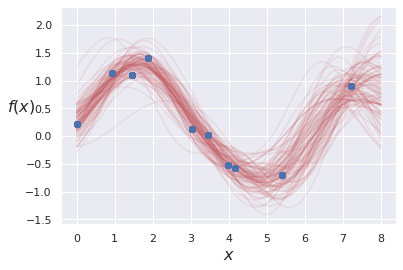

In [101]:
new_x = np.linspace(np.floor(x.min()), np.ceil(x.max()), 100) 
k = gauss_kernel(new_x, n_knots) 
gamma_pred = chain['gamma'] 
for i in range(100):
    idx = np.random.randint(0, len(gamma_pred)) 
    y_pred = np.dot(gamma_pred[idx], k)  # use a randomly sampled beta vector from the posterior to predict
    
    plt.plot(new_x, y_pred, 'r-', alpha=0.1) 
    plt.xlabel('$x$', fontsize=16)
    plt.ylabel('$f(x)$', fontsize=16, rotation=0) 
    plt.plot(x, y, 'bo')